In [334]:
import pandas as pd
import seaborn as sns

In [335]:
df=pd.read_csv("dermatology_database_1.csv")

In [336]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [337]:
import numpy as np

# Replace '?' with NaN
df['age'] = df['age'].replace('?', np.nan)

In [338]:
# Convert to numeric (automatically handles NaN)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   erythema                             366 non-null    int64  
 1   scaling                              366 non-null    int64  
 2   definite_borders                     366 non-null    int64  
 3   itching                              366 non-null    int64  
 4   koebner_phenomenon                   366 non-null    int64  
 5   polygonal_papules                    366 non-null    int64  
 6   follicular_papules                   366 non-null    int64  
 7   oral_mucosal_involvement             366 non-null    int64  
 8   knee_and_elbow_involvement           366 non-null    int64  
 9   scalp_involvement                    366 non-null    int64  
 10  family_history                       366 non-null    int64  
 11  melanin_incontinence            

In [340]:
## Splitting the data set into training and testing... (80% -> training, 20% -> testing)

In [341]:
from sklearn.model_selection import train_test_split

X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [342]:
### training and testing data sets
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [343]:
train_df['age']=train_df['age'].fillna(train_df['age'].median())

In [344]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')

In [345]:
# Select only ordinal 0–3 columns
ordinal_cols = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement',
    'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate',
    'fibrosis_papillary_dermis', 'exocytosis', 'acanthosis',
    'hyperkeratosis', 'parakeratosis', 'clubbing_rete_ridges',
    'elongation_rete_ridges', 'thinning_suprapapillary_epidermis',
    'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis',
    'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
    'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
    'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
    'band_like_infiltrate'
]

In [346]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

X = df[ordinal_cols]
y = LabelEncoder().fit_transform(df['class'])

mi = mutual_info_classif(X, y, discrete_features=True)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores.head(10))

elongation_rete_ridges               0.598274
clubbing_rete_ridges                 0.550450
thinning_suprapapillary_epidermis    0.546579
band_like_infiltrate                 0.486418
saw_tooth_appearance_retes           0.475650
vacuolisation_damage_basal_layer     0.474994
melanin_incontinence                 0.463070
focal_hypergranulosis                0.460865
polygonal_papules                    0.450003
exocytosis                           0.429934
dtype: float64


In [347]:
top10_mi_features = mi_scores.head(10).index.tolist()

In [348]:
top10_mi_features

['elongation_rete_ridges',
 'clubbing_rete_ridges',
 'thinning_suprapapillary_epidermis',
 'band_like_infiltrate',
 'saw_tooth_appearance_retes',
 'vacuolisation_damage_basal_layer',
 'melanin_incontinence',
 'focal_hypergranulosis',
 'polygonal_papules',
 'exocytosis']

In [349]:
# Update this mapping based on your actual labels
disease_map = {
    1: 'Psoriasis',
    2: 'Seborrheic Dermatitis',
    3: 'Lichen Planus',
    4: 'Pityriasis Rosea',
    5: 'Chronic Dermatitis',
    6: 'Pityriasis Rubra Pilaris'
}

train_df['class_new'] = train_df['class'].map(disease_map)

severity_map = {
    0: 'None',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe'
}

for col in top10_mi_features:
    train_df[col + '_new'] = train_df[col].map(severity_map)

In [350]:
for col in ordinal_cols:
    X_train[col] = pd.Categorical(X_train[col], categories=[0, 1, 2, 3], ordered=True)

In [351]:
X_train["family_history"] = df["family_history"].astype("category")  # Ensures FAMD treats it as a category

In [352]:
X_train['age']=X_train['age'].fillna(X_train['age'].median())

In [353]:
pip install prince

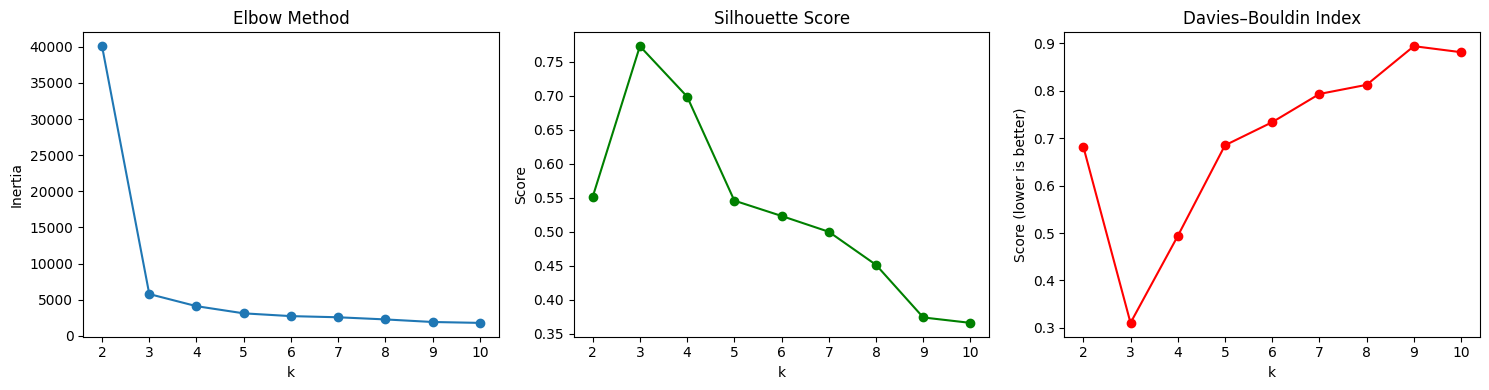

In [354]:

import prince

famd = prince.FAMD(n_components=2, random_state=42)
famd_data = famd.fit_transform(X_train)  # df = your original mixed data


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
db_scores = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    preds = model.fit_predict(famd_data)
    inertias.append(model.inertia_)
    silhouettes.append(silhouette_score(famd_data, preds))
    db_scores.append(davies_bouldin_score(famd_data, preds))


plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(K, inertias, 'o-')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(K, silhouettes, 'o-', color='green')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.plot(K, db_scores, 'o-', color='red')
plt.title('Davies–Bouldin Index')
plt.xlabel('k')
plt.ylabel('Score (lower is better)')

plt.tight_layout()
plt.show()


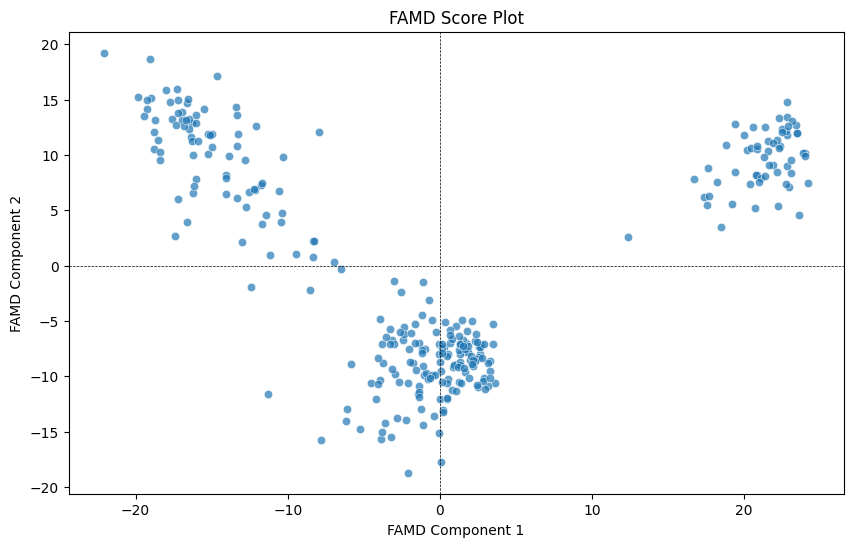

In [355]:
famd_scores = famd.transform(X_train)

# Plotting FAMD score plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=famd_scores.iloc[:, 0], y=famd_scores.iloc[:, 1], alpha=0.7)
#sns.scatterplot(x=famd_scores[0], y=famd_scores[1], alpha=0.7)
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot")
plt.show()

Cluster Sizes:
Cluster
0     79
1    154
2     59
Name: count, dtype: int64


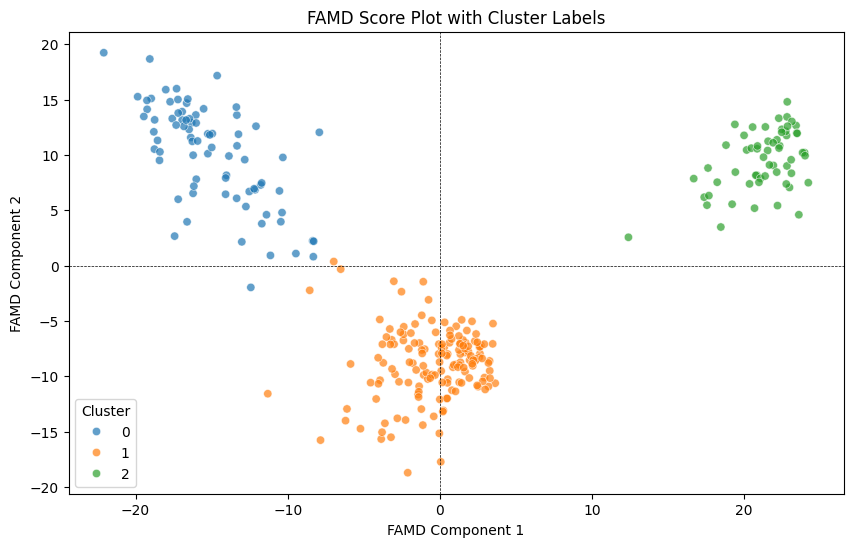

In [356]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # change 3 to your optimal k
cluster_labels = kmeans.fit_predict(famd_scores)

# 2. Add cluster labels to the FAMD scores
famd_scores_with_clusters = famd_scores.copy()
famd_scores_with_clusters['Cluster'] = cluster_labels

# 3. Print cluster sizes
cluster_sizes = famd_scores_with_clusters['Cluster'].value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)

# 4. Plot FAMD with cluster colors
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=famd_scores_with_clusters.iloc[:, 0],
    y=famd_scores_with_clusters.iloc[:, 1],
    hue=famd_scores_with_clusters['Cluster'],
    palette='tab10',
    alpha=0.7
)
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot with Cluster Labels")
plt.legend(title="Cluster")
plt.show()

Cluster Sizes (%):
Cluster 0: 27.05%
Cluster 1: 52.74%
Cluster 2: 20.21%


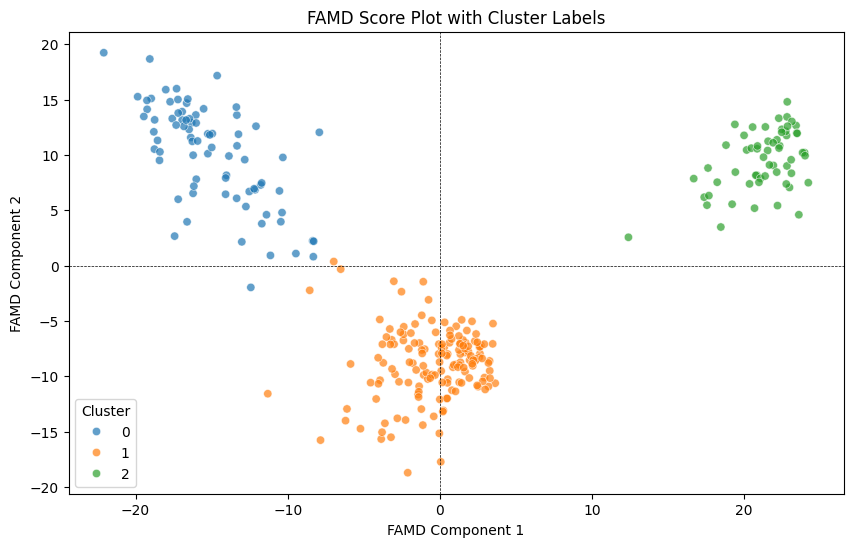

In [357]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(famd_scores)

# 2. Add cluster labels to the FAMD scores
famd_scores_with_clusters = famd_scores.copy()
famd_scores_with_clusters['Cluster'] = cluster_labels

# 3. Calculate cluster sizes and percentages
cluster_counts = famd_scores_with_clusters['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / len(famd_scores_with_clusters) * 100).round(2)

print("Cluster Sizes (%):")
for cluster, percent in cluster_percentages.items():
    print(f"Cluster {cluster}: {percent}%")

# 4. Plot FAMD with cluster colors
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=famd_scores_with_clusters.iloc[:, 0],
    y=famd_scores_with_clusters.iloc[:, 1],
    hue=famd_scores_with_clusters['Cluster'],
    palette='tab10',
    alpha=0.7
)
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot with Cluster Labels")
plt.legend(title="Cluster")
plt.show()

In [358]:
# Make sure the index in famd_scores matches train_df
train_df['Cluster'] = cluster_labels  # add predicted cluster to train_df

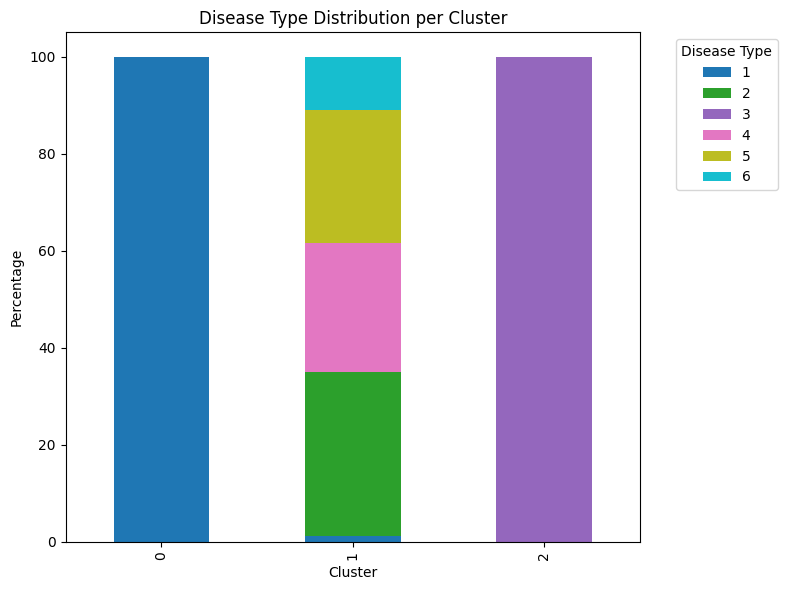

In [359]:
# Cross-tab to get % distribution of disease types per cluster
disease_cluster_dist = pd.crosstab(train_df['Cluster'], train_df['class'], normalize='index') * 100

# Plot as stacked bar chart
disease_cluster_dist.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab10')
plt.ylabel('Percentage')
plt.xlabel('Cluster')
plt.title('Disease Type Distribution per Cluster')
plt.legend(title='Disease Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [360]:
train_df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,clubbing_rete_ridges_new,thinning_suprapapillary_epidermis_new,band_like_infiltrate_new,saw_tooth_appearance_retes_new,vacuolisation_damage_basal_layer_new,melanin_incontinence_new,focal_hypergranulosis_new,polygonal_papules_new,exocytosis_new,Cluster
341,1,1,0,2,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,Mild,1
202,2,2,0,2,0,0,1,0,0,0,...,None,None,None,None,None,None,None,None,Mild,1
75,3,2,1,2,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,Moderate,1
84,1,1,2,3,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,Mild,1
354,2,0,1,2,0,0,0,0,0,0,...,None,None,None,None,None,None,None,None,Mild,1


In [361]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [362]:
X_train.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age'],
      dtype='object')

In [363]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


Extract cluster 1 observations

In [364]:

cluster1 = train_df[train_df['Cluster'] == 1]

In [365]:
cluster1.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class', 'class_new',
       'elongation_rete_ridges_new', 'clubbing_rete_ridges_new',
       'thinning_suprapapillary_epidermis_new', 'band

we removed 1% of class 1 patients from cluster 1

In [366]:
cluster1['class'].value_counts()

,count
class,
2,52
5,42
4,41
6,17
1,2


In [367]:
# Select columns that do NOT end with '_new' from the cluster1 DataFrame
columns_to_keep = [col for col in cluster1.columns if not col.endswith('_new')]
cluster1_cleaned = cluster1[columns_to_keep]

# Print the columns of the cleaned DataFrame to verify
print("Columns after removing '_new' features:")
cluster1_cleaned.columns

Columns after removing '_new' features:


Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class', 'Cluster'],
      dtype='object')

In [368]:
# Filter out class 1 from cluster1_cleaned
cluster1_filtered_for_smote = cluster1_cleaned[cluster1_cleaned['class'] != 1].copy()

# Separate features (X) and target (y) for the filtered and cleaned cluster 1 data
c1_y_train = cluster1_filtered_for_smote['class']
c1_x_train = cluster1_filtered_for_smote.drop(['class', 'Cluster'], axis=1)

c1_x_train.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age
341,1,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,68.0
202,2,2,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,0,52.0
75,3,2,1,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,25.0
84,1,1,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,55.0
354,2,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,56.0


In [369]:
ordinal_cols

['erythema',
 'scaling',
 'definite_borders',
 'itching',
 'koebner_phenomenon',
 'polygonal_papules',
 'follicular_papules',
 'oral_mucosal_involvement',
 'knee_and_elbow_involvement',
 'scalp_involvement',
 'melanin_incontinence',
 'eosinophils_infiltrate',
 'PNL_infiltrate',
 'fibrosis_papillary_dermis',
 'exocytosis',
 'acanthosis',
 'hyperkeratosis',
 'parakeratosis',
 'clubbing_rete_ridges',
 'elongation_rete_ridges',
 'thinning_suprapapillary_epidermis',
 'spongiform_pustule',
 'munro_microabcess',
 'focal_hypergranulosis',
 'disappearance_granular_layer',
 'vacuolisation_damage_basal_layer',
 'spongiosis',
 'saw_tooth_appearance_retes',
 'follicular_horn_plug',
 'perifollicular_parakeratosis',
 'inflammatory_mononuclear_infiltrate',
 'band_like_infiltrate']

In [370]:
# Frequency Encoding for ordinal columns in c1_x_train
for col in ordinal_cols:
  if col in c1_x_train.columns:
    # Calculate frequency for the column in the training data
    freq_map = c1_x_train[col].value_counts(normalize=True)
    # Map the frequencies to the training data
    c1_x_train[f'{col}_freq'] = c1_x_train[col].map(freq_map)

# Display the first few rows to check the new frequency encoded columns
c1_x_train.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,munro_microabcess_freq,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq
341,1,1,0,2,0,0,0,0,0,0,...,0.993421,0.993421,0.907895,1.0,0.302632,0.993421,0.888158,0.881579,0.513158,0.980263
202,2,2,0,2,0,0,1,0,0,0,...,0.993421,0.993421,0.907895,1.0,0.302632,0.993421,0.888158,0.881579,0.118421,0.980263
75,3,2,1,2,0,0,0,0,0,0,...,0.993421,0.993421,0.907895,1.0,0.427632,0.993421,0.888158,0.881579,0.513158,0.980263
84,1,1,2,3,0,0,0,0,0,0,...,0.993421,0.993421,0.907895,1.0,0.302632,0.993421,0.888158,0.881579,0.328947,0.980263
354,2,0,1,2,0,0,0,0,0,0,...,0.993421,0.993421,0.907895,1.0,0.302632,0.993421,0.888158,0.881579,0.513158,0.980263


In [371]:
# List of original ordinal columns
original_ordinal_cols = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement',
    'melanin_incontinence', 'eosinophils_infiltrate', 'PNL_infiltrate',
    'fibrosis_papillary_dermis', 'exocytosis', 'acanthosis',
    'hyperkeratosis', 'parakeratosis', 'clubbing_rete_ridges',
    'elongation_rete_ridges', 'thinning_suprapapillary_epidermis',
    'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis',
    'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
    'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
    'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
    'band_like_infiltrate'
]

# Drop the original ordinal columns from c1_x_train
c1_x_train = c1_x_train.drop(columns=original_ordinal_cols, errors='ignore')

# Display the first few rows to check the removed columns
c1_x_train.head()

,family_history,age,erythema_freq,scaling_freq,definite_borders_freq,itching_freq,koebner_phenomenon_freq,polygonal_papules_freq,follicular_papules_freq,oral_mucosal_involvement_freq,...,munro_microabcess_freq,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq
341,0,68.0,0.236842,0.361842,0.322368,0.296053,0.776316,1.0,0.828947,1.0,...,0.993421,0.993421,0.907895,1.0,0.302632,0.993421,0.888158,0.881579,0.513158,0.980263
202,0,52.0,0.559211,0.532895,0.322368,0.296053,0.776316,1.0,0.059211,1.0,...,0.993421,0.993421,0.907895,1.0,0.302632,0.993421,0.888158,0.881579,0.118421,0.980263
75,0,25.0,0.190789,0.532895,0.375000,0.296053,0.776316,1.0,0.828947,1.0,...,0.993421,0.993421,0.907895,1.0,0.427632,0.993421,0.888158,0.881579,0.513158,0.980263
84,0,55.0,0.236842,0.361842,0.296053,0.151316,0.776316,1.0,0.828947,1.0,...,0.993421,0.993421,0.907895,1.0,0.302632,0.993421,0.888158,0.881579,0.328947,0.980263
354,0,56.0,0.559211,0.039474,0.375000,0.296053,0.776316,1.0,0.828947,1.0,...,0.993421,0.993421,0.907895,1.0,0.302632,0.993421,0.888158,0.881579,0.513158,0.980263


In [372]:
# apply one hot encode for family_history column in c1_x_train
c1_x_train = pd.get_dummies(c1_x_train, columns=['family_history'], drop_first=True)



Apply smote resampling technique for cluster 1

In [373]:
# prompt: standardize all the columns and apply smote on c1_x _train

import pandas as pd
from imblearn.over_sampling import SMOTE

# Standardize all columns in c1_x_train
scaler = StandardScaler()
c1_x_train_scaled = scaler.fit_transform(c1_x_train)
c1_x_train_scaled = pd.DataFrame(c1_x_train_scaled, columns=c1_x_train.columns, index=c1_x_train.index)

# Apply SMOTE on the standardized data
# Set n_neighbors to a value less than or equal to the minimum number of samples in any class
smote = SMOTE(random_state=42, k_neighbors=5)
c1_x_train_smote, c1_y_train_smote = smote.fit_resample(c1_x_train_scaled, c1_y_train)


print("Shape of original c1_x_train:", c1_x_train.shape)
print("Shape of c1_y_train:", c1_y_train.shape)
print("Shape of c1_x_train after scaling and SMOTE:", c1_x_train_smote.shape)
print("Shape of c1_y_train after scaling and SMOTE:", c1_y_train_smote.shape)
print("\nValue counts of original c1_y_train:")
print(c1_y_train.value_counts())
print("\nValue counts of c1_y_train after SMOTE:")
print(c1_y_train_smote.value_counts())

Shape of original c1_x_train: (152, 34)
Shape of c1_y_train: (152,)
Shape of c1_x_train after scaling and SMOTE: (208, 34)
Shape of c1_y_train after scaling and SMOTE: (208,)

Value counts of original c1_y_train:
class
2    52
5    42
4    41
6    17
Name: count, dtype: int64

Value counts of c1_y_train after SMOTE:
class
5    52
2    52
4    52
6    52
Name: count, dtype: int64


In [374]:
c1_x_train_smote.head()

,age,erythema_freq,scaling_freq,definite_borders_freq,itching_freq,koebner_phenomenon_freq,polygonal_papules_freq,follicular_papules_freq,oral_mucosal_involvement_freq,knee_and_elbow_involvement_freq,...,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq,family_history_1
0,2.299591,-0.960820,-0.397580,-0.232440,0.304854,0.536147,0.0,0.454182,0.0,0.400181,...,0.081379,0.318511,0.0,-0.084673,0.081379,0.354823,0.366335,0.838665,0.141894,-0.29277
1,1.275492,0.876927,0.756045,-0.232440,0.304854,0.536147,0.0,-2.204530,0.0,0.400181,...,0.081379,0.318511,0.0,-0.084673,0.081379,0.354823,0.366335,-1.787924,0.141894,-0.29277
2,-0.452675,-1.223355,0.756045,1.007241,0.304854,0.536147,0.0,0.454182,0.0,0.400181,...,0.081379,0.318511,0.0,0.978531,0.081379,0.354823,0.366335,0.838665,0.141894,-0.29277
3,1.467510,-0.960820,-0.397580,-0.852281,-1.670788,0.536147,0.0,0.454182,0.0,0.400181,...,0.081379,0.318511,0.0,-0.084673,0.081379,0.354823,0.366335,-0.387076,0.141894,-0.29277
4,1.531516,0.876927,-2.571720,1.007241,0.304854,0.536147,0.0,0.454182,0.0,0.400181,...,0.081379,0.318511,0.0,-0.084673,0.081379,0.354823,0.366335,0.838665,0.141894,-0.29277


In [375]:
c1_y_train_smote.value_counts()

,count
class,
5,52
2,52
4,52
6,52


## Apply ridge regression for smote data and get classification accuracy for training data

In [376]:


from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Ridge Classifier model
ridge_model = RidgeClassifier(alpha=1,random_state=42)
ridge_model.fit(c1_x_train_smote, c1_y_train_smote)

y_train_pred = ridge_model.predict(c1_x_train_smote)

train_accuracy = accuracy_score(c1_y_train_smote, y_train_pred)

print(f"Classification Accuracy on SMOTE Training Data: {train_accuracy:.4f}")


print("\nClassification Report on SMOTE Training Data:")
print(classification_report(c1_y_train_smote, y_train_pred))

print("\nConfusion Matrix on SMOTE Training Data:")
print(confusion_matrix(c1_y_train_smote, y_train_pred))


Classification Accuracy on SMOTE Training Data: 0.9760

Classification Report on SMOTE Training Data:
              precision    recall  f1-score   support

           2       0.94      0.96      0.95        52
           4       0.98      0.94      0.96        52
           5       1.00      1.00      1.00        52
           6       0.98      1.00      0.99        52

    accuracy                           0.98       208
   macro avg       0.98      0.98      0.98       208
weighted avg       0.98      0.98      0.98       208


Confusion Matrix on SMOTE Training Data:
[[50  1  0  1]
 [ 3 49  0  0]
 [ 0  0 52  0]
 [ 0  0  0 52]]


## Apply lasso regression for smote data and get classification accuracy for training data

In [377]:

from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression

lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42, max_iter=1000)
lasso_model.fit(c1_x_train_smote, c1_y_train_smote)

# Predict on the trainign data
y_train_pred_lasso = lasso_model.predict(c1_x_train_smote)

# Calculate classification accuracy on the training data
train_accuracy_lasso = accuracy_score(c1_y_train_smote, y_train_pred_lasso)

print(f"Classification Accuracy on SMOTE Training Data (Lasso Regularized Logistic Regression): {train_accuracy_lasso:.4f}")

print("\nClassification Report on SMOTE Training Data (Lasso Regularized Logistic Regression):")
print(classification_report(c1_y_train_smote, y_train_pred_lasso))

print("\nConfusion Matrix on SMOTE Training Data (Lasso Regularized Logistic Regression):")
print(confusion_matrix(c1_y_train_smote, y_train_pred_lasso))

print("\nCoefficients from Lasso Regularized Logistic Regression:")
coefficients = pd.Series(lasso_model.coef_[0], index=c1_x_train_smote.columns)
print(coefficients[coefficients != 0].sort_values(ascending=False))

Classification Accuracy on SMOTE Training Data (Lasso Regularized Logistic Regression): 0.9808

Classification Report on SMOTE Training Data (Lasso Regularized Logistic Regression):
              precision    recall  f1-score   support

           2       0.94      0.98      0.96        52
           4       0.98      0.94      0.96        52
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        52

    accuracy                           0.98       208
   macro avg       0.98      0.98      0.98       208
weighted avg       0.98      0.98      0.98       208


Confusion Matrix on SMOTE Training Data (Lasso Regularized Logistic Regression):
[[51  1  0  0]
 [ 3 49  0  0]
 [ 0  0 52  0]
 [ 0  0  0 52]]

Coefficients from Lasso Regularized Logistic Regression:
fibrosis_papillary_dermis_freq              2.514132
koebner_phenomenon_freq                     1.906871
disappearance_granular_layer_freq           1.489602
follicular_papules_freq

## testing process

Test Dataframe with Cluster Labels:
    erythema scaling definite_borders itching koebner_phenomenon  \
193        2       2                2       0                  0   
33         2       2                1       0                  0   
15         1       1                0       1                  3   
310        3       2                2       0                  0   
57         2       1                1       3                  0   

    polygonal_papules follicular_papules oral_mucosal_involvement  \
193                 0                  0                        0   
33                  0                  0                        0   
15                  0                  0                        0   
310                 0                  0                        0   
57                  3                  0                        1   

    knee_and_elbow_involvement scalp_involvement  ...  \
193                          2                 2  ...   
33                        

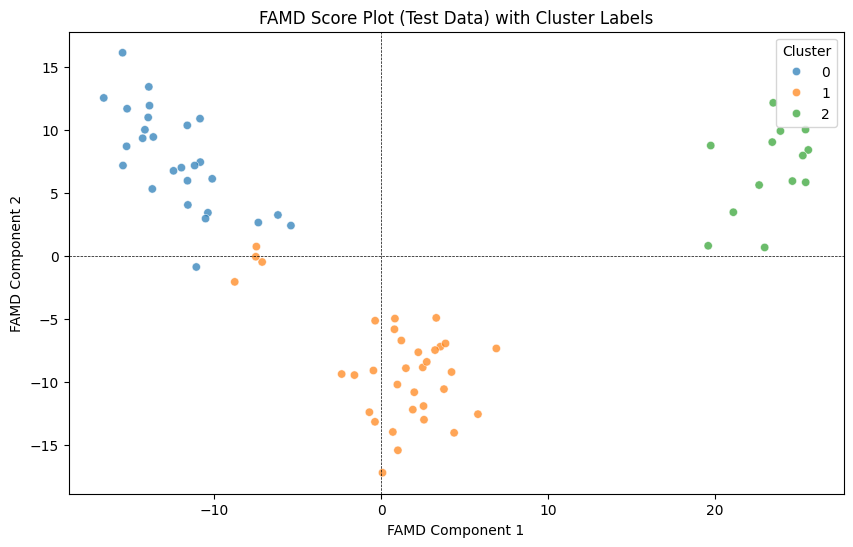

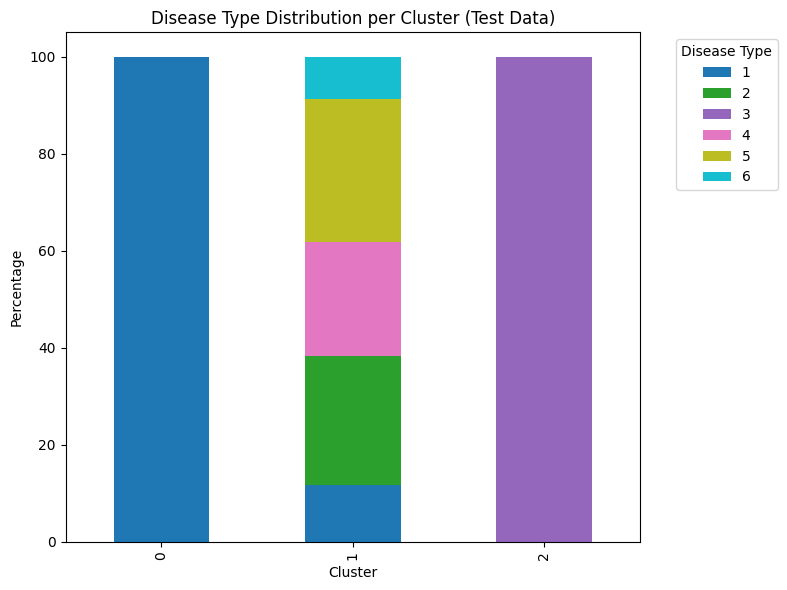

In [378]:
import matplotlib.pyplot as plt

# 1. Fill missing 'age' values in test_df
test_df['age'] = test_df['age'].fillna(test_df['age'].median())

# 2. Apply the same categorical transformation for ordinal columns in test_df
for col in ordinal_cols:
    if col in test_df.columns:
        test_df[col] = pd.Categorical(test_df[col], categories=[0, 1, 2, 3], ordered=True)

# 3. Transform 'family_history' to category in test_df
if 'family_history' in test_df.columns:
    test_df["family_history"] = test_df["family_history"].astype("category")

# 4. Apply FAMD transform on the preprocessed test_df
X_test_famd_cols = test_df[X_train.columns] # Ensure columns match X_train
famd_data_test = famd.transform(X_test_famd_cols)

# 5. Apply KMeans prediction on the transformed test data(predefined kmeans model)
test_cluster_labels = kmeans.predict(famd_data_test)

# 6. Add cluster labels to the test_df
test_df['Cluster'] = test_cluster_labels

print("Test Dataframe with Cluster Labels:")
print(test_df.head())

print("\nCluster distribution in Test Data:")
print(test_df['Cluster'].value_counts())


famd_data_test_with_clusters = famd_data_test.copy()
if isinstance(famd_data_test, pd.DataFrame):
    famd_data_test_with_clusters['Cluster'] = test_cluster_labels
else:
    famd_data_test_with_clusters = pd.DataFrame(famd_data_test, index=test_df.index)
    famd_data_test_with_clusters.columns = [f'FAMD{i+1}' for i in range(famd_data_test.shape[1])]
    famd_data_test_with_clusters['Cluster'] = test_cluster_labels


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=famd_data_test_with_clusters.iloc[:, 0],
    y=famd_data_test_with_clusters.iloc[:, 1],
    hue=famd_data_test_with_clusters['Cluster'],
    palette='tab10',
    alpha=0.7
)
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Score Plot (Test Data) with Cluster Labels")
plt.legend(title="Cluster")
plt.show()

# Cross-tab to get % distribution of disease types per cluster in test data
disease_cluster_dist_test = pd.crosstab(test_df['Cluster'], test_df['class'], normalize='index') * 100

# Plot as stacked bar chart for test data
disease_cluster_dist_test.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab10')
plt.ylabel('Percentage')
plt.xlabel('Cluster')
plt.title('Disease Type Distribution per Cluster (Test Data)')
plt.legend(title='Disease Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [379]:
#  extract  cluster 1 rows c1_x_test and extract response of it as c1_y_test

cluster1_test = test_df[test_df['Cluster'] == 1].copy()
cluster1_test= cluster1_test[cluster1_test['class'] != 1]
c1_y_test = cluster1_test['class']
c1_x_test = cluster1_test.drop(['class', 'Cluster'], axis=1)

print("Shape of c1_x_test:", c1_x_test.shape)
print("Shape of c1_y_test:", c1_y_test.shape)

print("\nc1_x_test head:")
c1_x_test.head()


Shape of c1_x_test: (30, 34)
Shape of c1_y_test: (30,)

c1_x_test head:


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age
15,1,1,0,1,3,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,40.0
76,2,2,2,1,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,33.0
126,2,2,2,0,0,0,2,0,2,0,...,0,0,0,0,0,2,2,2,0,8.0
137,3,3,2,1,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,37.0
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55.0


In [380]:
# Frequency Encoding
for col in ordinal_cols:
    freq_encoding = c1_x_test[col].value_counts(normalize=True)
    c1_x_test[col + '_freq'] = c1_x_test[col].map(freq_encoding)

# Drop original columns
c1_x_test.drop(columns=ordinal_cols, inplace=True)
c1_x_test.head()

,family_history,age,erythema_freq,scaling_freq,definite_borders_freq,itching_freq,koebner_phenomenon_freq,polygonal_papules_freq,follicular_papules_freq,oral_mucosal_involvement_freq,...,munro_microabcess_freq,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq
15,0,40.0,0.233333,0.500000,0.300000,0.333333,0.066667,1.0,0.866667,1.0,...,1.0,1.0,0.866667,1.0,0.366667,1.0,0.866667,0.900000,0.500000,1.0
76,0,33.0,0.600000,0.433333,0.266667,0.333333,0.766667,1.0,0.866667,1.0,...,1.0,1.0,0.866667,1.0,0.233333,1.0,0.866667,0.900000,0.033333,1.0
126,0,8.0,0.600000,0.433333,0.266667,0.266667,0.766667,1.0,0.133333,1.0,...,1.0,1.0,0.866667,1.0,0.200000,1.0,0.100000,0.066667,0.500000,1.0
137,0,37.0,0.166667,0.066667,0.266667,0.333333,0.766667,1.0,0.866667,1.0,...,1.0,1.0,0.866667,1.0,0.366667,1.0,0.866667,0.900000,0.333333,1.0
0,0,55.0,0.600000,0.433333,0.300000,0.200000,0.766667,1.0,0.866667,1.0,...,1.0,1.0,0.866667,1.0,0.233333,1.0,0.866667,0.900000,0.333333,1.0


In [381]:
# Apply One-Hot Encoding to 'family_history' column and rename it to match the training data
if 'family_history' in c1_x_test.columns:

    c1_x_test = pd.get_dummies(c1_x_test, columns=['family_history'], drop_first=True)
    if 'family_history' in c1_x_test.columns:
         c1_x_test.rename(columns={'family_history': 'family_history_1'}, inplace=True)

c1_x_test.head()

,age,erythema_freq,scaling_freq,definite_borders_freq,itching_freq,koebner_phenomenon_freq,polygonal_papules_freq,follicular_papules_freq,oral_mucosal_involvement_freq,knee_and_elbow_involvement_freq,...,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq,family_history_1
15,40.0,0.233333,0.500000,0.300000,0.333333,0.066667,1.0,0.866667,1.0,0.866667,...,1.0,0.866667,1.0,0.366667,1.0,0.866667,0.900000,0.500000,1.0,False
76,33.0,0.600000,0.433333,0.266667,0.333333,0.766667,1.0,0.866667,1.0,0.866667,...,1.0,0.866667,1.0,0.233333,1.0,0.866667,0.900000,0.033333,1.0,False
126,8.0,0.600000,0.433333,0.266667,0.266667,0.766667,1.0,0.133333,1.0,0.100000,...,1.0,0.866667,1.0,0.200000,1.0,0.100000,0.066667,0.500000,1.0,False
137,37.0,0.166667,0.066667,0.266667,0.333333,0.766667,1.0,0.866667,1.0,0.866667,...,1.0,0.866667,1.0,0.366667,1.0,0.866667,0.900000,0.333333,1.0,False
0,55.0,0.600000,0.433333,0.300000,0.200000,0.766667,1.0,0.866667,1.0,0.033333,...,1.0,0.866667,1.0,0.233333,1.0,0.866667,0.900000,0.333333,1.0,False


In [382]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Standardize all columns in c1_x_train
scaler = StandardScaler()
c1_x_test_scaled = scaler.fit_transform(c1_x_test)

# Convert the scaled data back to a DataFrame (optional but often useful)
c1_x_test_scaled = pd.DataFrame(c1_x_test_scaled, columns=c1_x_test.columns, index=c1_x_test.index)


c1_x_test_scaled.head()

,age,erythema_freq,scaling_freq,definite_borders_freq,itching_freq,koebner_phenomenon_freq,polygonal_papules_freq,follicular_papules_freq,oral_mucosal_involvement_freq,knee_and_elbow_involvement_freq,...,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq,family_history_1
15,0.187251,-1.074795,0.548250,-0.282843,1.249390,-2.074352,0.0,0.392232,0.0,0.391925,...,0.0,0.391925,0.0,1.295239,0.0,0.391925,0.333269,0.847587,0.0,-0.185695
76,-0.337053,0.811813,-0.084346,-0.707107,1.249390,0.549828,0.0,0.392232,0.0,0.391925,...,0.0,0.391925,0.0,-0.470996,0.0,0.391925,0.333269,-2.448584,0.0,-0.185695
126,-2.209567,0.811813,-0.084346,-0.707107,0.078087,0.549828,0.0,-2.549510,0.0,-2.484973,...,0.0,0.391925,0.0,-0.912554,0.0,-2.484973,-2.955572,0.847587,0.0,-0.185695
137,-0.037450,-1.417814,-3.563625,-0.707107,1.249390,0.549828,0.0,0.392232,0.0,0.391925,...,0.0,0.391925,0.0,1.295239,0.0,0.391925,0.333269,-0.329617,0.0,-0.185695
0,1.310760,0.811813,-0.084346,-0.282843,-1.093216,0.549828,0.0,0.392232,0.0,-2.735138,...,0.0,0.391925,0.0,-0.470996,0.0,0.391925,0.333269,-0.329617,0.0,-0.185695


## Apply ridge model to test data

In [383]:
# Make predictions on the scaled test data for cluster 1 using the trained Ridge model
y_test_pred_ridge = ridge_model.predict(c1_x_test_scaled)

# Calculate accuracy on the test data for cluster 1
test_accuracy_ridge = accuracy_score(c1_y_test, y_test_pred_ridge)

print(f"\nClassification Accuracy on Cluster 1 Test Data (Ridge): {test_accuracy_ridge:.4f}")

print("\nClassification Report on Cluster 1 Test Data (Ridge):")
print(classification_report(c1_y_test, y_test_pred_ridge))

print("\nConfusion Matrix on Cluster 1 Test Data (Ridge):")
print(confusion_matrix(c1_y_test, y_test_pred_ridge))



Classification Accuracy on Cluster 1 Test Data (Ridge): 0.9667

Classification Report on Cluster 1 Test Data (Ridge):
              precision    recall  f1-score   support

           2       0.90      1.00      0.95         9
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix on Cluster 1 Test Data (Ridge):
[[ 9  0  0  0]
 [ 1  7  0  0]
 [ 0  0 10  0]
 [ 0  0  0  3]]


## Apply lasso reg model to c1_x_test_scaled data and get the accuracy

In [384]:




y_test_pred_lasso = lasso_model.predict(c1_x_test_scaled)

# Calculate accuracy on the test data for cluster 1
test_accuracy_lasso = accuracy_score(c1_y_test, y_test_pred_lasso)

print(f"\nClassification Accuracy on Cluster 1 Test Data (Lasso Regularized Logistic Regression): {test_accuracy_lasso:.4f}")

# Optional: Print classification report for the test data
print("\nClassification Report on Cluster 1 Test Data (Lasso Regularized Logistic Regression):")
print(classification_report(c1_y_test, y_test_pred_lasso))

# Optional: Print confusion matrix for the test data
print("\nConfusion Matrix on Cluster 1 Test Data (Lasso Regularized Logistic Regression):")
print(confusion_matrix(c1_y_test, y_test_pred_lasso))


Classification Accuracy on Cluster 1 Test Data (Lasso Regularized Logistic Regression): 1.0000

Classification Report on Cluster 1 Test Data (Lasso Regularized Logistic Regression):
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix on Cluster 1 Test Data (Lasso Regularized Logistic Regression):
[[ 9  0  0  0]
 [ 0  8  0  0]
 [ 0  0 10  0]
 [ 0  0  0  3]]


In [385]:
y_test_pred_lasso

array([4, 2, 6, 2, 2, 5, 4, 2, 4, 4, 5, 5, 6, 4, 4, 5, 2, 2, 2, 6, 5, 5,
       2, 4, 5, 5, 5, 5, 2, 4])

In [386]:
c1_x_test_scaled.dtypes

,0
age,float64
erythema_freq,float64
scaling_freq,float64
definite_borders_freq,float64
itching_freq,float64
koebner_phenomenon_freq,float64
polygonal_papules_freq,float64
follicular_papules_freq,float64
oral_mucosal_involvement_freq,float64
knee_and_elbow_involvement_freq,float64


### Applying Hyper parameter tuning for the lasso model

In [387]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for Ridge Classifier
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0]}

# Initialize GridSearchCV
# Use StratifiedKFold to maintain the class distribution within folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_ridge = GridSearchCV(
    estimator=RidgeClassifier(random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',  # or 'f1_weighted' or other appropriate metric
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit GridSearchCV to the SMOTE-resampled training data
grid_search_ridge.fit(c1_x_train_smote, c1_y_train_smote)

# Print the best parameters and best score
print("Best parameters found: ", grid_search_ridge.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_ridge.best_score_))

# Get the best model
best_ridge_model = grid_search_ridge.best_estimator_

# Evaluate the best model on the SMOTE-resampled training data
y_train_pred_tuned_ridge = best_ridge_model.predict(c1_x_train_smote)
train_accuracy_tuned_ridge = accuracy_score(c1_y_train_smote, y_train_pred_tuned_ridge)

print(f"\nClassification Accuracy on SMOTE Training Data (Tuned Ridge): {train_accuracy_tuned_ridge:.4f}")


print("\nClassification Report on SMOTE Training Data (Tuned Ridge):")
print(classification_report(c1_y_train_smote, y_train_pred_tuned_ridge))


print("\nConfusion Matrix on SMOTE Training Data (Tuned Ridge):")
print(confusion_matrix(c1_y_train_smote, y_train_pred_tuned_ridge))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'alpha': 0.1}
Best cross-validation accuracy: 0.9614

Classification Accuracy on SMOTE Training Data (Tuned Ridge): 0.9760

Classification Report on SMOTE Training Data (Tuned Ridge):
              precision    recall  f1-score   support

           2       0.94      0.96      0.95        52
           4       0.98      0.94      0.96        52
           5       1.00      1.00      1.00        52
           6       0.98      1.00      0.99        52

    accuracy                           0.98       208
   macro avg       0.98      0.98      0.98       208
weighted avg       0.98      0.98      0.98       208


Confusion Matrix on SMOTE Training Data (Tuned Ridge):
[[50  1  0  1]
 [ 3 49  0  0]
 [ 0  0 52  0]
 [ 0  0  0 52]]


In [388]:
# Make predictions on the scaled test data for cluster 1 using the best_ridge_model
y_test_pred_tuned_ridge = best_ridge_model.predict(c1_x_test_scaled)

# Calculate accuracy on the test data for cluster 1
test_accuracy_tuned_ridge = accuracy_score(c1_y_test, y_test_pred_tuned_ridge)

print(f"\nClassification Accuracy on Cluster 1 Test Data (Tuned Ridge): {test_accuracy_tuned_ridge:.4f}")


print("\nClassification Report on Cluster 1 Test Data (Tuned Ridge):")
print(classification_report(c1_y_test, y_test_pred_tuned_ridge))

print("\nConfusion Matrix on Cluster 1 Test Data (Tuned Ridge):")
print(confusion_matrix(c1_y_test, y_test_pred_tuned_ridge))


Classification Accuracy on Cluster 1 Test Data (Tuned Ridge): 0.9667

Classification Report on Cluster 1 Test Data (Tuned Ridge):
              precision    recall  f1-score   support

           2       0.90      1.00      0.95         9
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix on Cluster 1 Test Data (Tuned Ridge):
[[ 9  0  0  0]
 [ 1  7  0  0]
 [ 0  0 10  0]
 [ 0  0  0  3]]


accuracy does not change here even after the parameter tuning.

### Checking  Linearity assumption


In [389]:
# Get the predicted probabilities for the test data using the lasso_model
# This will return an array of probabilities, with columns corresponding to the classes
predicted_probabilities_lasso = lasso_model.predict_proba(c1_x_test_scaled)

# Display the first few rows of the predicted probabilities
print("Predicted Probabilities (Lasso Regularized Logistic Regression) for Cluster 1 Test Data:")
print(predicted_probabilities_lasso)

# You can also see the order of classes that the probabilities correspond to
print("\nClasses corresponding to the probability columns:")
print(lasso_model.classes_)

Predicted Probabilities (Lasso Regularized Logistic Regression) for Cluster 1 Test Data:
[[1.79765572e-02 9.72820877e-01 4.84333246e-03 4.35923324e-03]
 [9.74028945e-01 1.58784454e-02 4.83322002e-03 5.25938979e-03]
 [4.71334358e-03 1.18485883e-02 4.83014760e-03 9.78607920e-01]
 [9.35108123e-01 5.51358506e-02 4.93639695e-03 4.81962949e-03]
 [8.93071336e-01 5.93959280e-02 6.48020944e-03 4.10525265e-02]
 [2.20330160e-02 1.46144046e-02 9.61121416e-01 2.23116391e-03]
 [6.23359640e-02 9.27104351e-01 4.84316590e-03 5.71651930e-03]
 [9.74519446e-01 1.35978649e-02 4.81910139e-03 7.06358751e-03]
 [1.17388950e-01 8.72014917e-01 4.85988238e-03 5.73625021e-03]
 [5.77206280e-04 9.89669010e-01 4.86914441e-03 4.88463881e-03]
 [1.80801908e-02 1.22533795e-02 9.65909324e-01 3.75710585e-03]
 [7.20677017e-03 4.59452396e-03 9.81758521e-01 6.44018462e-03]
 [6.98562102e-03 9.52690647e-03 4.83803702e-03 9.78649435e-01]
 [8.20850869e-04 9.90372809e-01 4.87217793e-03 3.93416191e-03]
 [1.31359529e-01 8.60315827e-

In [390]:

# Get the classes from the lasso model
classes = lasso_model.classes_


predicted_probabilities_lasso_clipped = np.clip(predicted_probabilities_lasso, 1e-15, 1 - 1e-15)

logit_probabilities = np.log(predicted_probabilities_lasso_clipped / (1 - predicted_probabilities_lasso_clipped))

# Create a DataFrame for better readability, with class labels as column names
logit_df = pd.DataFrame(logit_probabilities, columns=[f'Logit_Class_{cls}' for cls in classes], index=c1_x_test_scaled.index)

print("Logit Values of Predicted Probabilities for Each Class (Cluster 1 Test Data):")
print(logit_df.head())

Logit Values of Predicted Probabilities for Each Class (Cluster 1 Test Data):
     Logit_Class_2  Logit_Class_4  Logit_Class_5  Logit_Class_6
15       -4.000547       3.577751      -5.325297      -5.431090
76        3.624458      -4.126787      -5.327397      -5.242467
126      -5.352633      -4.423627      -5.328036       3.823110
137       2.667940      -2.841241      -5.306171      -5.330227
0         2.122505      -2.762297      -5.032501      -3.150984


Data type of 'family_history_1' before conversion: float64
Unique values in 'family_history_1' before conversion: [-0.29277002  3.41565026  1.37787054  2.50842755  2.40426019  3.2716598
  1.70863523]
Data type of 'family_history_1' after conversion: int64
Unique values in 'family_history_1' after conversion: [0 3 1 2]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


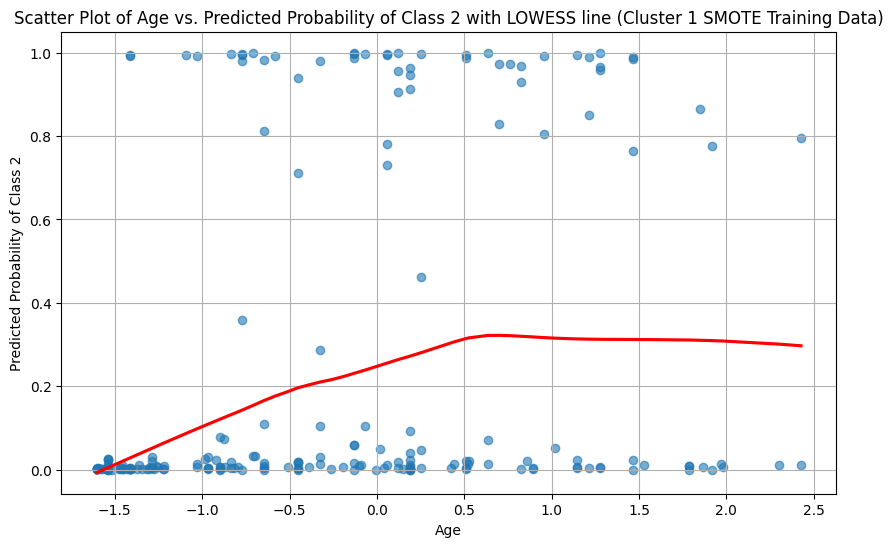

In [391]:

X_train_for_prob_plot = c1_x_train_smote.copy()
y_train_for_prob_plot = c1_y_train_smote.copy()


model_for_prob_plot = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42, max_iter=1000)
X_train_for_prob_plot.replace([np.inf, -np.inf], np.nan, inplace=True)

nan_indices = X_train_for_prob_plot.isnull().any(axis=1)
X_train_for_prob_plot_cleaned = X_train_for_prob_plot[~nan_indices].copy()
y_train_for_prob_plot_cleaned = y_train_for_prob_plot[~nan_indices].copy()

# --- Explicitly convert boolean 'family_history_1' to integer (0 or 1) ---
if 'family_history_1' in X_train_for_prob_plot_cleaned.columns:
    # Add diagnostic prints
    print(f"Data type of 'family_history_1' before conversion: {X_train_for_prob_plot_cleaned['family_history_1'].dtype}")
    print(f"Unique values in 'family_history_1' before conversion: {X_train_for_prob_plot_cleaned['family_history_1'].unique()}")

    # Attempt conversion, coercing errors
    X_train_for_prob_plot_cleaned['family_history_1'] = pd.to_numeric(X_train_for_prob_plot_cleaned['family_history_1'], errors='coerce').fillna(0).astype(int) # Use to_numeric with coerce and fillna for robustness

    # Add diagnostic prints after conversion
    print(f"Data type of 'family_history_1' after conversion: {X_train_for_prob_plot_cleaned['family_history_1'].dtype}")
    print(f"Unique values in 'family_history_1' after conversion: {X_train_for_prob_plot_cleaned['family_history_1'].unique()}")
# -----------------------------------------------------------------------

model_for_prob_plot.fit(X_train_for_prob_plot_cleaned, y_train_for_prob_plot_cleaned)

# Get the predicted probabilities for the cleaned training data
predicted_probabilities_train = model_for_prob_plot.predict_proba(X_train_for_prob_plot_cleaned)


if 2 in model_for_prob_plot.classes_:
    class_index_to_plot = list(model_for_prob_plot.classes_).index(2) # Change 2 to the class you want to plot

    # Extract the probabilities for the chosen class
    probabilities_class_to_plot = predicted_probabilities_train[:, class_index_to_plot]

    # Get the corresponding 'age' values for the cleaned data
    age_for_plot = X_train_for_prob_plot_cleaned['age']

    # Create the scatter plot with LOWESS line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=age_for_plot, y=probabilities_class_to_plot, scatter_kws={'alpha':0.6}, lowess=True, line_kws={'color': 'red'})
    plt.xlabel('Age')
    plt.ylabel(f'Predicted Probability of Class {model_for_prob_plot.classes_[class_index_to_plot]}')
    plt.title(f'Scatter Plot of Age vs. Predicted Probability of Class {model_for_prob_plot.classes_[class_index_to_plot]} with LOWESS line (Cluster 1 SMOTE Training Data)')
    plt.grid(True)
    plt.show()
else:
    print("Class 2 not found in the fitted model's classes. Cannot plot probability for Class 2.")

age and logit of predictions have non linaer relationship so the linearity assumption violates

In [392]:
c1_x_train_smote.head()

,age,erythema_freq,scaling_freq,definite_borders_freq,itching_freq,koebner_phenomenon_freq,polygonal_papules_freq,follicular_papules_freq,oral_mucosal_involvement_freq,knee_and_elbow_involvement_freq,...,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq,family_history_1
0,2.299591,-0.960820,-0.397580,-0.232440,0.304854,0.536147,0.0,0.454182,0.0,0.400181,...,0.081379,0.318511,0.0,-0.084673,0.081379,0.354823,0.366335,0.838665,0.141894,-0.29277
1,1.275492,0.876927,0.756045,-0.232440,0.304854,0.536147,0.0,-2.204530,0.0,0.400181,...,0.081379,0.318511,0.0,-0.084673,0.081379,0.354823,0.366335,-1.787924,0.141894,-0.29277
2,-0.452675,-1.223355,0.756045,1.007241,0.304854,0.536147,0.0,0.454182,0.0,0.400181,...,0.081379,0.318511,0.0,0.978531,0.081379,0.354823,0.366335,0.838665,0.141894,-0.29277
3,1.467510,-0.960820,-0.397580,-0.852281,-1.670788,0.536147,0.0,0.454182,0.0,0.400181,...,0.081379,0.318511,0.0,-0.084673,0.081379,0.354823,0.366335,-0.387076,0.141894,-0.29277
4,1.531516,0.876927,-2.571720,1.007241,0.304854,0.536147,0.0,0.454182,0.0,0.400181,...,0.081379,0.318511,0.0,-0.084673,0.081379,0.354823,0.366335,0.838665,0.141894,-0.29277


## Applying Naive Bias Classifier

In [393]:

c1_x_train_smote_original_scale = scaler.inverse_transform(c1_x_train_smote)

# Convert the result back to a DataFrame for easier viewing, using the original column names
c1_x_train_s = pd.DataFrame(c1_x_train_smote_original_scale, columns=c1_x_train_smote.columns)
c1_x_train_s

,age,erythema_freq,scaling_freq,definite_borders_freq,itching_freq,koebner_phenomenon_freq,polygonal_papules_freq,follicular_papules_freq,oral_mucosal_involvement_freq,knee_and_elbow_involvement_freq,...,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq,family_history_1
0,68.201903,0.255485,0.400323,0.303960,0.279573,0.763017,1.0,0.882110,1.0,0.868867,...,1.081379,0.847102,1.0,0.262497,1.081379,0.856779,0.908378,0.498737,1.141894,-0.019220
1,54.529127,0.612655,0.521899,0.303960,0.279573,0.763017,1.0,0.219332,1.0,0.868867,...,1.081379,0.847102,1.0,0.262497,1.081379,0.856779,0.908378,0.126869,1.141894,-0.019220
2,31.456318,0.204460,0.521899,0.401359,0.279573,0.763017,1.0,0.882110,1.0,0.868867,...,1.081379,0.847102,1.0,0.342758,1.081379,0.856779,0.908378,0.498737,1.141894,-0.019220
3,57.092773,0.255485,0.400323,0.255261,0.167127,0.763017,1.0,0.882110,1.0,0.868867,...,1.081379,0.847102,1.0,0.262497,1.081379,0.856779,0.908378,0.325198,1.141894,-0.019220
4,57.947321,0.612655,0.171199,0.401359,0.279573,0.763017,1.0,0.882110,1.0,0.868867,...,1.081379,0.847102,1.0,0.262497,1.081379,0.856779,0.908378,0.498737,1.141894,-0.019220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,16.893386,0.612655,0.521899,0.331353,0.320463,0.763017,1.0,0.210481,1.0,0.096173,...,1.081379,0.847102,1.0,0.243576,1.081379,-0.002956,0.116586,0.498737,1.141894,0.646461
204,20.280827,0.206441,0.517178,0.303960,0.208016,0.763017,1.0,0.229562,1.0,0.115945,...,0.601093,0.847102,1.0,0.172311,1.081379,0.022531,0.142529,0.491999,1.141894,0.620614
205,16.340152,0.612655,0.521899,0.378645,0.320463,0.763017,1.0,0.204979,1.0,0.083884,...,1.081379,0.847102,1.0,0.310578,1.081379,-0.002956,0.100462,0.498737,1.141894,0.646461
206,17.792703,0.307603,0.491179,0.328571,0.292050,0.763017,1.0,0.230661,1.0,0.073186,...,1.081379,0.847102,1.0,0.167790,1.081379,0.219186,0.094291,0.176983,-0.670591,-0.019220


In [394]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler to scale data to [0, 1]
minmax_scaler = MinMaxScaler()

# Fit and transform the data
c1_x_train_smote_minmax_scaled = minmax_scaler.fit_transform(c1_x_train_s)

# Convert the scaled data back to a DataFrame for easier viewing
c1_x_train_s1 = pd.DataFrame(c1_x_train_smote_minmax_scaled, columns=c1_x_train_s.columns)

print("c1_x_train_smote data after Min-Max scaling (0 to 1):")
c1_x_train_s1.head()

c1_x_train_smote data after Min-Max scaling (0 to 1):


,age,erythema_freq,scaling_freq,definite_borders_freq,itching_freq,koebner_phenomenon_freq,polygonal_papules_freq,follicular_papules_freq,oral_mucosal_involvement_freq,knee_and_elbow_involvement_freq,...,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq,family_history_1
0,0.968254,0.409639,0.653333,0.857143,0.733333,1.0,0.0,1.000,0.0,1.0,...,1.0,1.0,0.0,0.612245,1.0,1.0,1.0,1.000000,1.0,0.0
1,0.714286,1.000000,1.000000,0.857143,0.733333,1.0,0.0,0.025,0.0,1.0,...,1.0,1.0,0.0,0.612245,1.0,1.0,1.0,0.166667,1.0,0.0
2,0.285714,0.325301,1.000000,1.000000,0.733333,1.0,0.0,1.000,0.0,1.0,...,1.0,1.0,0.0,1.000000,1.0,1.0,1.0,1.000000,1.0,0.0
3,0.761905,0.409639,0.653333,0.785714,0.000000,1.0,0.0,1.000,0.0,1.0,...,1.0,1.0,0.0,0.612245,1.0,1.0,1.0,0.611111,1.0,0.0
4,0.777778,1.000000,0.000000,1.000000,0.733333,1.0,0.0,1.000,0.0,1.0,...,1.0,1.0,0.0,0.612245,1.0,1.0,1.0,1.000000,1.0,0.0


In [395]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix

model = CategoricalNB()
model.fit(c1_x_train_s1, c1_y_train_smote)

# Predict and evaluate
y_pred = model.predict(c1_x_train_s1)
print("Classification Report:\n", classification_report(c1_y_train_smote, y_pred))
print("Confusion Matrix:\n", confusion_matrix(c1_y_train_smote, y_pred))

Classification Report:
               precision    recall  f1-score   support

           2       0.85      0.90      0.88        52
           4       0.90      0.85      0.87        52
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        52

    accuracy                           0.94       208
   macro avg       0.94      0.94      0.94       208
weighted avg       0.94      0.94      0.94       208

Confusion Matrix:
 [[47  5  0  0]
 [ 8 44  0  0]
 [ 0  0 52  0]
 [ 0  0  0 52]]


In [396]:
c1_x_test.head()

,age,erythema_freq,scaling_freq,definite_borders_freq,itching_freq,koebner_phenomenon_freq,polygonal_papules_freq,follicular_papules_freq,oral_mucosal_involvement_freq,knee_and_elbow_involvement_freq,...,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq,family_history_1
15,40.0,0.233333,0.500000,0.300000,0.333333,0.066667,1.0,0.866667,1.0,0.866667,...,1.0,0.866667,1.0,0.366667,1.0,0.866667,0.900000,0.500000,1.0,False
76,33.0,0.600000,0.433333,0.266667,0.333333,0.766667,1.0,0.866667,1.0,0.866667,...,1.0,0.866667,1.0,0.233333,1.0,0.866667,0.900000,0.033333,1.0,False
126,8.0,0.600000,0.433333,0.266667,0.266667,0.766667,1.0,0.133333,1.0,0.100000,...,1.0,0.866667,1.0,0.200000,1.0,0.100000,0.066667,0.500000,1.0,False
137,37.0,0.166667,0.066667,0.266667,0.333333,0.766667,1.0,0.866667,1.0,0.866667,...,1.0,0.866667,1.0,0.366667,1.0,0.866667,0.900000,0.333333,1.0,False
0,55.0,0.600000,0.433333,0.300000,0.200000,0.766667,1.0,0.866667,1.0,0.033333,...,1.0,0.866667,1.0,0.233333,1.0,0.866667,0.900000,0.333333,1.0,False


In [397]:
# Fit and transform the data
c1_x_test_smote_minmax_scaled = minmax_scaler.fit_transform(c1_x_test)

# Convert the scaled data back to a DataFrame for easier viewing
c1_x_test_s1 = pd.DataFrame(c1_x_test_smote_minmax_scaled, columns=c1_x_train_s.columns)

print("c1_x_train_smote data after Min-Max scaling (0 to 1):")
c1_x_test_s1.head()

c1_x_train_smote data after Min-Max scaling (0 to 1):


,age,erythema_freq,scaling_freq,definite_borders_freq,itching_freq,koebner_phenomenon_freq,polygonal_papules_freq,follicular_papules_freq,oral_mucosal_involvement_freq,knee_and_elbow_involvement_freq,...,focal_hypergranulosis_freq,disappearance_granular_layer_freq,vacuolisation_damage_basal_layer_freq,spongiosis_freq,saw_tooth_appearance_retes_freq,follicular_horn_plug_freq,perifollicular_parakeratosis_freq,inflammatory_mononuclear_infiltrate_freq,band_like_infiltrate_freq,family_history_1
0,0.516129,0.153846,1.000000,0.727273,1.0,0.0,0.0,1.0,0.0,1.00,...,0.0,1.0,0.0,1.0,0.0,1.00,1.000000,1.000000,0.0,0.0
1,0.403226,1.000000,0.846154,0.636364,1.0,1.0,0.0,1.0,0.0,1.00,...,0.0,1.0,0.0,0.2,0.0,1.00,1.000000,0.000000,0.0,0.0
2,0.000000,1.000000,0.846154,0.636364,0.5,1.0,0.0,0.0,0.0,0.08,...,0.0,1.0,0.0,0.0,0.0,0.08,0.038462,1.000000,0.0,0.0
3,0.467742,0.000000,0.000000,0.636364,1.0,1.0,0.0,1.0,0.0,1.00,...,0.0,1.0,0.0,1.0,0.0,1.00,1.000000,0.642857,0.0,0.0
4,0.758065,1.000000,0.846154,0.727273,0.0,1.0,0.0,1.0,0.0,0.00,...,0.0,1.0,0.0,0.2,0.0,1.00,1.000000,0.642857,0.0,0.0


In [398]:
c1_x_test_s1.shape

(30, 34)

In [399]:
model.fit(c1_x_test_s1, c1_y_test)
# Predict and evaluate
y_pred1 = model.predict(c1_x_test_s1)
print("Classification Report:\n", classification_report(c1_y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(c1_y_test, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           2       0.75      0.67      0.71         9
           4       0.88      0.88      0.88         8
           5       0.82      0.90      0.86        10
           6       1.00      1.00      1.00         3

    accuracy                           0.83        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.83      0.83      0.83        30

Confusion Matrix:
 [[6 1 2 0]
 [1 7 0 0]
 [1 0 9 0]
 [0 0 0 3]]


### Appling hyper parameter tuning

In [400]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import CategoricalNB

# Initialize model
nb = CategoricalNB()

# Define parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 5.0],          # Laplace smoothing strength
    'fit_prior': [True, False],             # Learn class priors or use uniform
    'min_categories': [None, 5, 10]         # (Optional) enforce minimum categories per feature
}

# Set up grid search with cross-validation
grid = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit using your training set
grid.fit(c1_x_train_s1, c1_y_train_smote)

# Show best params and scores
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# Retrieve and evaluate best model
best_nb = grid.best_estimator_
y_pred = best_nb.predict(c1_x_train_s1)
print("Classification Report:\n", classification_report(c1_y_train_smote, y_pred))
print("Confusion Matrix:\n", confusion_matrix(c1_y_train_smote, y_pred))


Best parameters: {'alpha': 1.0, 'fit_prior': False, 'min_categories': None}
Best CV accuracy: 0.9324041811846691
Classification Report:
               precision    recall  f1-score   support

           2       0.85      0.90      0.88        52
           4       0.90      0.85      0.87        52
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        52

    accuracy                           0.94       208
   macro avg       0.94      0.94      0.94       208
weighted avg       0.94      0.94      0.94       208

Confusion Matrix:
 [[47  5  0  0]
 [ 8 44  0  0]
 [ 0  0 52  0]
 [ 0  0  0 52]]
